# Difference Between Return Sequence and Return States for LSTMs in KERAS

You can go through this link:- https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

The Keras deep learning library provides an implementation of the Long Short-Term Memory, or LSTM, recurrent neural network.

As part of this implementation, the Keras API provides access to both return sequences and return state. 

Conclusion:- 
    
1. That return sequences return the hidden state output for each input time step.

2. That return state returns the hidden state output and cell state for the last input time step.

3. That return sequences and return state can be used at the same time.

This discussion is divided into 4 parts; they are:

i)   Long Short-Term Memory

ii)  Return Sequences

iii) Return States

iv)  Return States and Sequences

# Long Short-Term Memory

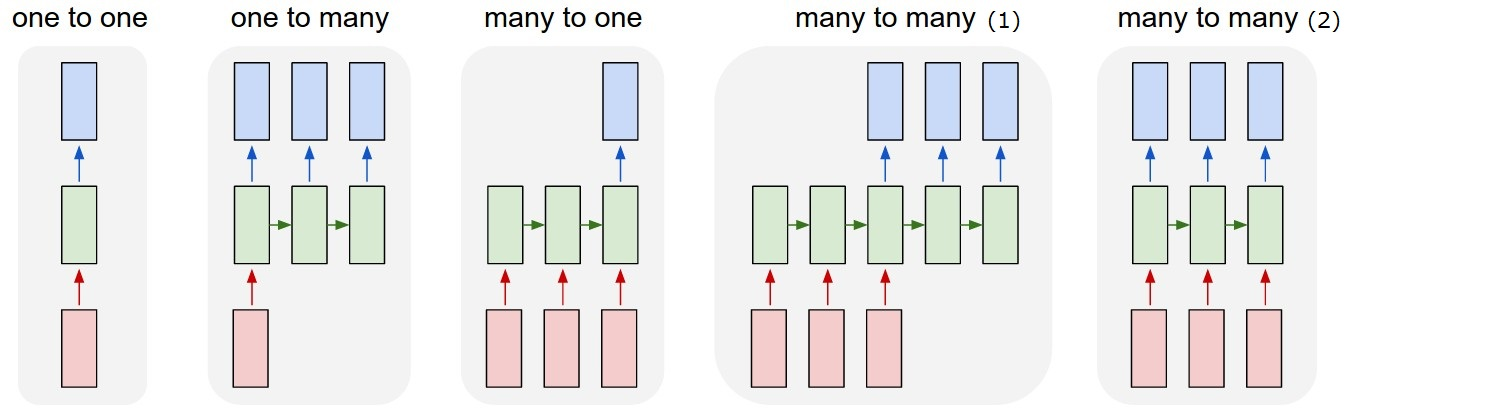

In [6]:
Image("1.jpg")

The Long Short-Term Memory, or LSTM, is a recurrent neural network that is comprised of internal gates.
 
The network’s internal gates allow the model to be trained successfully using backpropagation through time, or BPTT, and avoid the vanishing gradients problem.

In the Keras deep learning library, LSTM layers can be created using the LSTM() class.

Creating a layer of LSTM memory units allows to specify the number of memory units within the layer.

Each unit or cell within the layer has an internal cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“.

The Keras API allows to access these data, which can be useful or even required when developing sophisticated recurrent neural network architectures, such as the encoder-decoder model.

Each LSTM cell will output one hidden state h for each input.

We can demonstrate this in Keras with a very small model with a single LSTM layer that itself contains a single LSTM cell.

In this example, we will have one input sample with 3 time steps and one feature observed at each time step:

In [1]:
from keras.models import Model
from keras.layers import Input, LSTM
import numpy as np 

# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)

# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print("data:\n",data,'\n')

# make and show prediction
print("output:")
output=model.predict(data)
print("\nhidden state for last time step:\n",output)

data:
 [[[0.1]
  [0.2]
  [0.3]]] 

output:

hidden state for last time step:
 [[0.0673786]]


Here outputs is for "a single hidden state" and also for the input sequence with 3 time steps.

Your specific output value will differ given the random initialization of the LSTM weights and cell state.



# Return Sequences

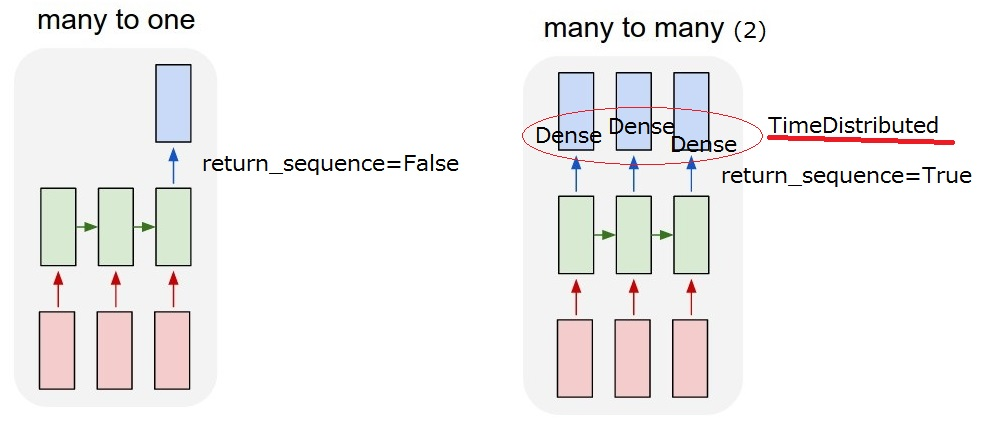

In [5]:
from IPython.display import Image
Image(filename='2.jpg') 

It is possible to access the hidden state output for each input time step.

This can be done by setting the return_sequences attribute to True when defining the LSTM layer, as follows:



We can update the previous example with this change.

In [2]:
from keras.models import Model
from keras.layers import Input, LSTM
import numpy as np 

# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)

# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print("data:\n",data,'\n')

# make and show prediction
print("output:")
print("\nhidden state for each time step:\n")
print(model.predict(data))

data:
 [[[0.1]
  [0.2]
  [0.3]]] 

output:

hidden state for each time step:

[[[-0.01320348]
  [-0.03355782]
  [-0.05661795]]]


 Here the example returns a sequence of 3 values,  "one hidden state"  output for "each input time step" for the single LSTM cell in the layer.

We must set return_sequences=True when stacking LSTM layers so that the second LSTM layer has a three-dimensional sequence input.

In Stacked LSTM, multiple LSTM layer used one after another in a single model.For more details follow the link:- https://machinelearningmastery.com/stacked-long-short-term-memory-networks/

You may also need to access the sequence of hidden state outputs when predicting a sequence of outputs with a Dense output layer wrapped in a TimeDistributed layer. For more details follow the link:- https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/

# Return States

The output of an LSTM cell or layer of cells is called the hidden state.

This is confusing, because each LSTM cell retains an internal state that is not output, called the cell state, or c.

Generally, we do not need to access the cell state unless we are developing sophisticated models where subsequent layers may need to have their cell state initialized with the final cell state of another layer, such as in an encoder-decoder model.

Keras provides the return_state argument to the LSTM layer that will provide access to the hidden state output (state_h) and the cell state (state_c).

In [3]:
from keras.models import Model
from keras.layers import Input,LSTM
import numpy as np

# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])

# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print("data:\n",data)

# make and show prediction
print("\noutput:")
output=model.predict(data)
print("\nhidden state for last time step:",output[0],'\n')

print("\nhidden state for last time step(again):",output[0],'\n')

print("\ncell state for last time step:",output[0],'\n')

data:
 [[[0.1]
  [0.2]
  [0.3]]]

output:

hidden state for last time step: [[-0.00606467]] 


hidden state for last time step(again): [[-0.00606467]] 


cell state for last time step: [[-0.00606467]] 



Output returns 3 things: Looks carefully and check above output,

1. The LSTM hidden state output for only the last time step.


2. The LSTM hidden state output for only the last time step (again).


3. The LSTM cell state for the last time step.


The hidden state and the cell state could in turn be used to initialize the states of another LSTM layer with the same number of cells.

# Return States and Sequences (using both)

We can access both the sequence of hidden state and the cell states at the same time.

In [4]:
from keras.models import Model
from keras.layers import Input, LSTM
import numpy as np

# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_sequences=True, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])

# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print("data:\n",data)

# make and show prediction
print('output:')
output = model.predict(data)
print('\nhidden state for each time step:\n',output[0],'\n')
print('\nhidden state for last time step:\n',output[1],'\n')
print('\ncell state for last time step:\n',output[2],'\n')

data:
 [[[0.1]
  [0.2]
  [0.3]]]
output:

hidden state for each time step:
 [[[-0.01498907]
  [-0.03916679]
  [-0.06894413]]] 


hidden state for last time step:
 [[-0.06894413]] 


cell state for last time step:
 [[-0.14988035]] 



Output gives: (look carefully above) 

The LSTM hidden state output for the each 3 time step.

The LSTM hidden state output for the last time step.

The LSTM cell state for the last time step.

In output, we can see now why the LSTM output tensor and hidden state output tensor are declared separably.

The layer returns the hidden state for each input time step, then separately, the hidden state output for the last time step and the cell state for the last input time step.

This can be confirmed by seeing that the last value in the returned sequences (first array) matches the value in the hidden state (second array).